#  Multivariate Regression(GD)

In this notebook we are going to implement multivariate regression(gradient descent version). In particular, you will have to:

* Complete the function `cost_function` to implement cost function for multivariate regression(gradient descent version) algorithm.
* Complete the function `GDmultiLinparamEstimates` to implement multivariate regression(gradient descent version) algorithm.


# Import libraries

The required libraries for this notebook are pandas, sklearn and numpy.

In [2]:
# import libraries
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
The data we are using is from ***multi_regr_data.csv***. It consists of 1000 data related to student marks. Each data point has 3 columns(marks) and we are going to use all of them for multivariate linear regression. In particular, we will use the first 2 marks to predict the 3rd mark.


In [3]:
# Loading the CSV file
dataset=pandas.read_csv('./datasets/multi_regr_data.csv')
print(dataset.shape) #(data_number,feature_number)

(1000, 3)


# Split data into training and testing

In [7]:
# Split the data, we will use first 2 columns as features and the 3rd columns as target.
X = dataset[list(dataset.columns)[:-1]]
Y = dataset[list(dataset.columns)[-1]]

# As pointed out in previous lab, we need to add a constant feature
intercept=np.ones((X.shape[0],1))
X=np.concatenate((intercept,X),axis=1)

# Split the data into training and testing(75% training and 25% testing data)
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state=0)


[(1000, 2), (1000,)]


# Optimize using Gradient Descent Algorithm

The cost function is defined as follows:
\begin{align}
J\left(\beta \right) & =  {\frac{1}{2n}}\sum_{i=1}^n \left(y_i - \hat{y_i} \right)^2\\
\end{align}
or 
\begin{align}
J\left(\beta \right) & =  {\frac{1}{2n}}SSR\left(y_i,\hat{y_i} \right)\end{align}

You are asked to implement this cost function.

In [13]:
def cost_function(X, Y, beta):
    n=X.shape[0]
    J = np.sum((X.dot(beta) - Y) ** 2)/(2 * n)
    return J

# initialize B
beta= np.zeros(3, dtype=float)

# cal initial cost
inital_cost = cost_function(X, Y, beta)
print(inital_cost)

2470.11


**Gradient Descent Steps:**

1. Initialize values:  
   $$\beta_0, \beta_1, \dots, \beta_n$$  
   It is suggested to initialize with 0.

2. Iteratively update, until convergence:  
   $$\beta_j := \beta_j - \alpha \frac{\partial}{\partial \beta_j} J(\beta)$$  

   where $\alpha$ is the learning rate.

**Hint:** Step 2 function can also be written as:  
   $$\beta_j := \beta_j - \alpha \frac{1}{n} \sum_{i=1}^n \left( \hat{y}_i - y_i \right) x_{ij}$$

In [14]:
def GDmultiLinparamEstimates(X, Y, beta, learning_rate, iterations):
    cost_history = [0] * iterations  # 初始化代价历史记录列表，存储每次迭代的代价值
    n = X.shape[0]  # 获取样本数量，用于梯度计算的归一化

    for iteration in range(iterations):  # 进行指定次数的迭代
        # 计算预测误差（损失）
        loss = X.dot(beta) - Y  # 用当前参数计算预测值与实际值 Y 的差值，即损失

        # 计算梯度
        gradient = X.T.dot(loss)  # 通过特征矩阵 X 的转置与损失向量相乘，得到梯度值

        # 更新 beta 参数
        beta = beta - learning_rate * gradient / n  # 根据梯度下降公式更新 beta，每次减少一小步

        # 计算当前迭代的代价函数值
        cost = cost_function(X, Y, beta)  # 使用更新后的 beta 计算代价
        cost_history[iteration] = cost  # 将当前代价值记录到代价历史列表中

    return beta, cost_history  # 返回最终的 beta 值和整个迭代过程中的代价历史

# 设置迭代次数和学习率
iterations = 100000  # 迭代次数
learning_rate = 0.0001  # 学习率，即步长

# 运行梯度下降算法，得到更新后的参数和代价历史
newB, cost_history = GDmultiLinparamEstimates(X, Y, beta, learning_rate, iterations)

# 输出更新后的 beta 参数值
print(newB)

# 输出最终的代价值（即最后一次迭代的代价）
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.475123473539167


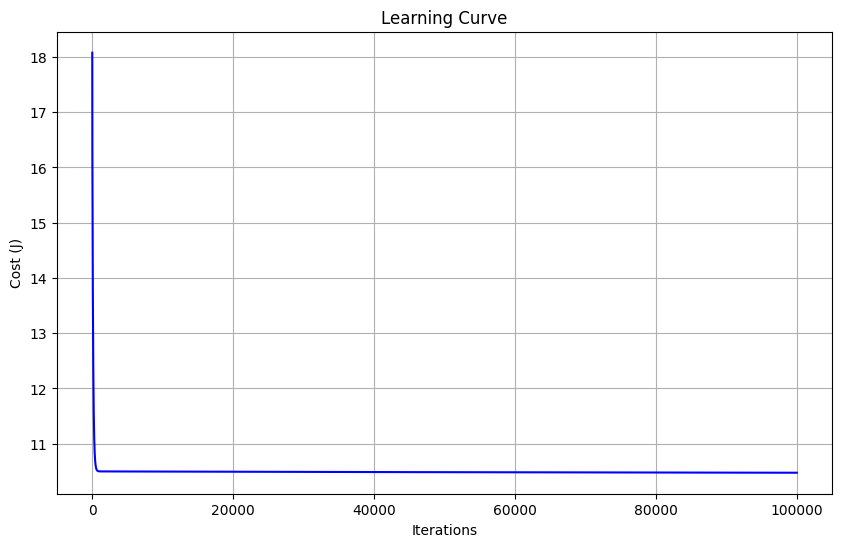

In [11]:
import matplotlib.pyplot as plt

# 绘制学习曲线
def plot_learning_curve(cost_history):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cost_history)), cost_history, color='b')
    plt.xlabel('Iterations')  # 横坐标为迭代次数
    plt.ylabel('Cost (J)')  # 纵坐标为代价函数值
    plt.title('Learning Curve')  # 图标题
    plt.grid()
    plt.show()

# 调用绘图函数
plot_learning_curve(cost_history)

The final hypothesis for the whole dataset (i.e. X and Y as defined above) should be:
\begin{align}
y & = -0.47889172 + 0.09137252*x_1 + 0.90144884*x_2
\end{align}

# Congrat! 

Now, you have learned how to implement multivariate regression algorithm using gradient descent method. The next step would be to test your algorithm on test dataset, which we encourage you to do it yourself given the experience in previous lab.